In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})


file_path = 'domino_minizinc/df_results.csv'

# Carica il file CSV in un DataFrame
df_minizinc = pd.read_csv(file_path)


file_path = 'domino_clingo/risultati_clingo.csv'

# Carica il file CSV in un DataFrame
df_clingo = pd.read_csv(file_path)


In [104]:
df_minizinc[:20]

,ID,Modello,Difficoltà,Numero tessere,Dimensione scacchiera,Tempo esecuzione (s),Totale tessere,Tessere inserite,Tessere non inserite,solver,batch
0,1,domino_orientamento,easy,3,4,0.916837,3,3,0,Gecode,0
1,1,domino_posizione,easy,3,4,0.107933,3,3,0,Gecode,0
2,1,domino_base,easy,3,4,0.102202,3,3,0,Gecode,0
3,1,domino_inserite,easy,3,4,0.103697,3,3,0,Gecode,0
4,2,domino_orientamento,easy,5,5,0.150094,5,5,0,Gecode,0
5,2,domino_posizione,easy,5,5,0.329738,5,5,0,Gecode,0
6,2,domino_base,easy,5,5,0.141791,5,5,0,Gecode,0
7,2,domino_inserite,easy,5,5,0.145523,5,5,0,Gecode,0
8,3,domino_orientamento,easy,5,4,1.252338,5,3,2,Gecode,0
9,3,domino_posizione,easy,5,4,3.201549,5,3,2,Gecode,0


In [105]:
# Unisce le colonne 'Modello' e 'solver' in una nuova colonna 'Modello_Solver'
df_minizinc['Modello_Solver'] = df_minizinc['Modello'].astype(str) + "_" + df_minizinc['solver'].astype(str)
df_minizinc

,ID,Modello,Difficoltà,Numero tessere,Dimensione scacchiera,Tempo esecuzione (s),Totale tessere,Tessere inserite,Tessere non inserite,solver,batch,Modello_Solver
0,1,domino_orientamento,easy,3,4,0.916837,3,3,0,Gecode,0,domino_orientamento_Gecode
1,1,domino_posizione,easy,3,4,0.107933,3,3,0,Gecode,0,domino_posizione_Gecode
2,1,domino_base,easy,3,4,0.102202,3,3,0,Gecode,0,domino_base_Gecode
3,1,domino_inserite,easy,3,4,0.103697,3,3,0,Gecode,0,domino_inserite_Gecode
4,2,domino_orientamento,easy,5,5,0.150094,5,5,0,Gecode,0,domino_orientamento_Gecode
...,...,...,...,...,...,...,...,...,...,...,...,...
495,6,domino_base,medium,9,8,1.373176,9,9,0,chuffed,9,domino_base_chuffed
496,7,domino_base,medium,9,6,3.875508,9,8,1,chuffed,9,domino_base_chuffed
497,8,domino_base,medium,10,8,1.835217,10,10,0,chuffed,9,domino_base_chuffed
498,9,domino_base,hard,11,12,0.581370,11,11,0,chuffed,9,domino_base_chuffed


In [106]:
df_clingo["Modello_Solver"] = 'clingo'
df_clingo.rename(columns={'Batch':'batch'}, inplace=True)
df_clingo

,ID,Difficoltà,Numero tessere,Dimensione scacchiera,Tempo esecuzione (s),Totale tessere,Tessere inserite,Tessere non inserite,batch,Modello_Solver
0,1,easy,3,4,0.031965,3,3,0,0,clingo
1,2,easy,5,5,16.614161,5,5,0,0,clingo
2,3,easy,5,4,0.139611,5,4,1,0,clingo
3,4,easy,4,2,0.006907,4,0,4,0,clingo
4,5,medium,9,9,300.008862,9,8,1,0,clingo
...,...,...,...,...,...,...,...,...,...,...
95,6,medium,9,8,300.005987,9,8,1,9,clingo
96,7,medium,9,6,300.003585,9,6,3,9,clingo
97,8,medium,10,8,300.004022,10,9,1,9,clingo
98,9,hard,11,12,300.027749,11,5,6,9,clingo


In [107]:
df = pd.concat([df_minizinc, df_clingo])
df

,ID,Modello,Difficoltà,Numero tessere,Dimensione scacchiera,Tempo esecuzione (s),Totale tessere,Tessere inserite,Tessere non inserite,solver,batch,Modello_Solver
0,1,domino_orientamento,easy,3,4,0.916837,3,3,0,Gecode,0,domino_orientamento_Gecode
1,1,domino_posizione,easy,3,4,0.107933,3,3,0,Gecode,0,domino_posizione_Gecode
2,1,domino_base,easy,3,4,0.102202,3,3,0,Gecode,0,domino_base_Gecode
3,1,domino_inserite,easy,3,4,0.103697,3,3,0,Gecode,0,domino_inserite_Gecode
4,2,domino_orientamento,easy,5,5,0.150094,5,5,0,Gecode,0,domino_orientamento_Gecode
...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,NaN,medium,9,8,300.005987,9,8,1,NaN,9,clingo
96,7,NaN,medium,9,6,300.003585,9,6,3,NaN,9,clingo
97,8,NaN,medium,10,8,300.004022,10,9,1,NaN,9,clingo
98,9,NaN,hard,11,12,300.027749,11,5,6,NaN,9,clingo


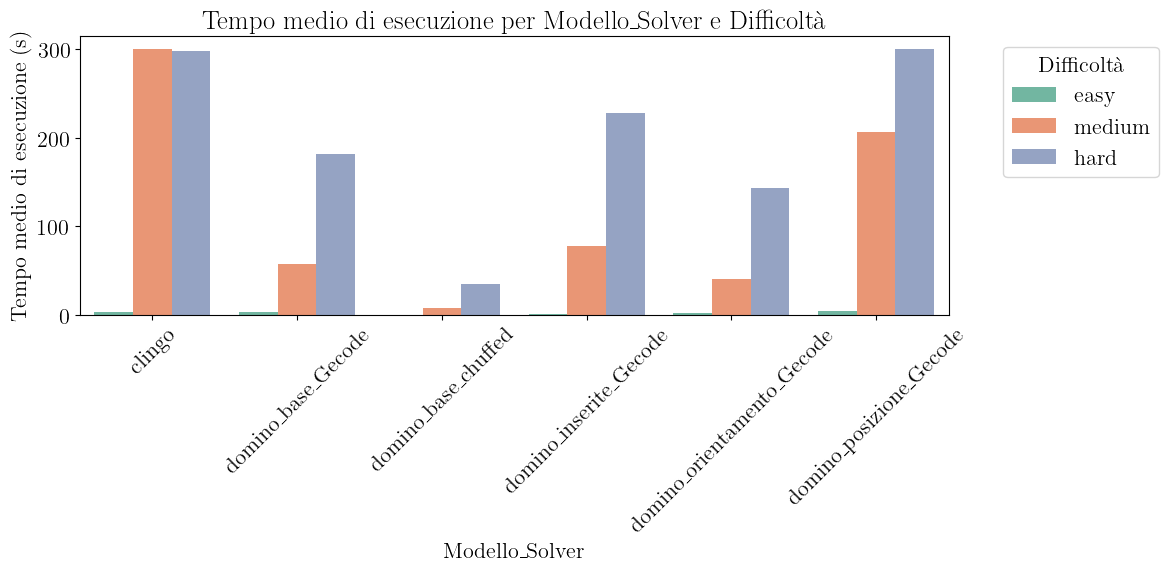

In [108]:
# Calcola il tempo medio di esecuzione per ogni combinazione di Modello_Solver e Difficoltà
media_tempi = df.groupby(['Modello_Solver', 'Difficoltà'])['Tempo esecuzione (s)'].mean().reset_index()

# Imposta l'ordine delle categorie per 'Difficoltà'
media_tempi['Difficoltà'] = pd.Categorical(media_tempi['Difficoltà'], categories=["easy", "medium", "hard"], ordered=True)

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Modello_Solver', y='Tempo esecuzione (s)', hue='Difficoltà', data=media_tempi, palette="Set2", hue_order=["easy", "medium", "hard"])

# Migliora la leggibilità ruotando le etichette dell'asse x
plt.xticks(rotation=45)

# Aggiungi titolo e etichette agli assi
plt.title('Tempo medio di esecuzione per Modello_Solver e Difficoltà')
plt.xlabel('Modello_Solver')
plt.ylabel('Tempo medio di esecuzione (s)')

# Imposta la legenda in un posto migliore
plt.legend(title='Difficoltà', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


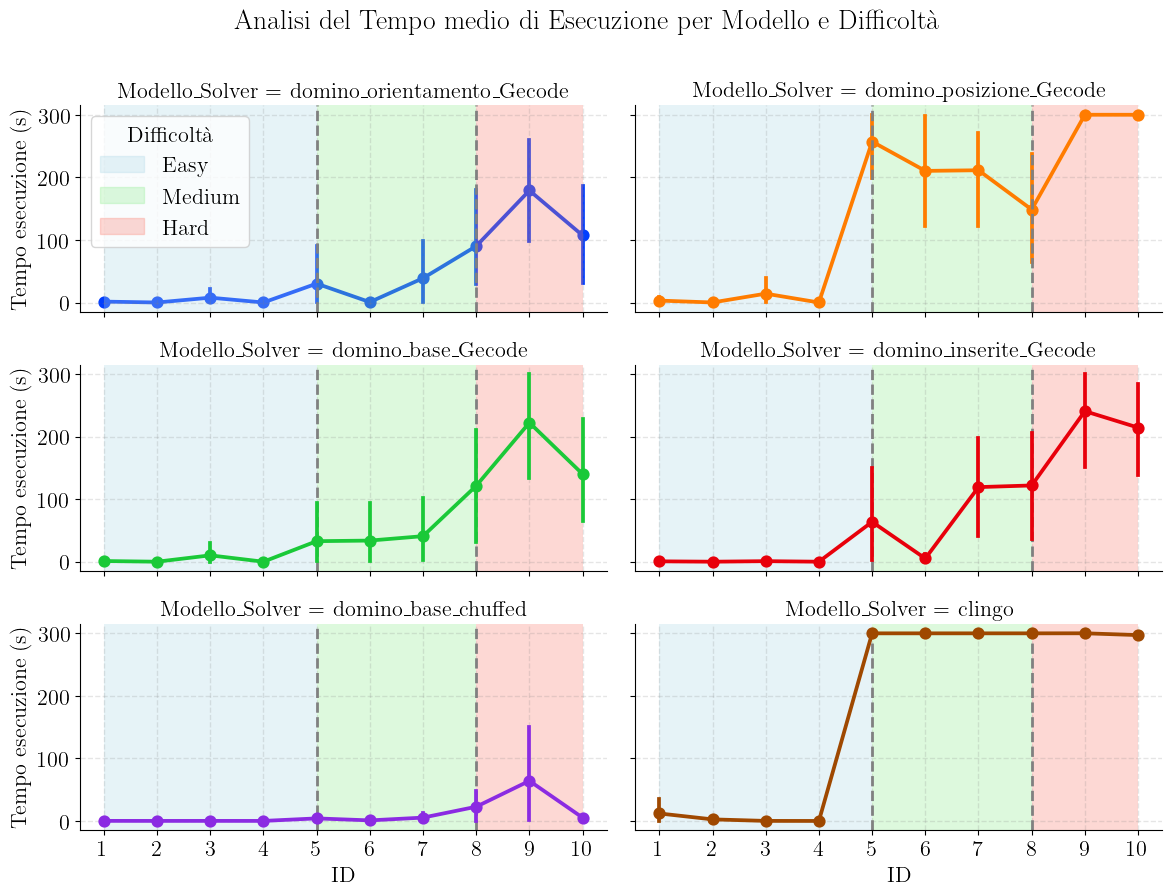

In [109]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'

g = sns.catplot(x='ID', 
                y='Tempo esecuzione (s)', 
                hue='Modello_Solver', 
                data=df, 
                kind='point', 
                palette='bright', 
                col='Modello_Solver', 
                col_wrap=2, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=3, 
                aspect=2
                ) # Controllo del rapporto altezza/larghezza di ogni grafico

colors = ['lightblue', 'lightgreen', 'salmon']


# Cicla attraverso ciascun asse e aggiungi le bande colorate
for ax in g.axes.ravel():
    # Banda colorata prima della prima linea verticale (ID < 5)
    ax.axvspan(xmin=0, xmax=4, facecolor=colors[0], alpha=0.3)
    # Banda colorata tra la prima e la seconda linea verticale (5 <= ID < 8)
    ax.axvspan(xmin=4, xmax=7, facecolor=colors[1], alpha=0.3)
    # Banda colorata dopo la seconda linea verticale (ID >= 8)
    ax.axvspan(xmin=7, xmax=9, facecolor=colors[2], alpha=0.3)

# Cicla attraverso ciascun asse e aggiungi le linee verticali a ID=5 e ID=8
for ax in g.axes.ravel():
    # Aggiungi la prima linea verticale a ID=5
    ax.axvline(x=4, color='grey', ls='--', lw=2) # 
    # Aggiungi la seconda linea verticale a ID=8
    ax.axvline(x=7, color='grey', ls='--', lw=2) # 
    
    # Aggiungi la griglia con alta opacità
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1, alpha=0.2)


# Crea le patch per la legenda
easy_patch = mpatches.Patch(color='lightblue', label='Easy', alpha=0.3)
medium_patch = mpatches.Patch(color='lightgreen', label='Medium', alpha=0.3)
hard_patch = mpatches.Patch(color='salmon', label='Hard', alpha=0.3)

# Aggiungi la legenda al primo asse (subplot)
g.axes[0].legend(handles=[easy_patch, medium_patch, hard_patch], title="Difficoltà", loc='best')

# Aggiungi il titolo unico sopra tutti i grafici
g.fig.suptitle('Analisi del Tempo medio di Esecuzione per Modello e Difficoltà', fontsize=20, y = 1)

# Utilizza plt.tight_layout() con un'aggiustamento per 'pad'
plt.tight_layout()

# Quando salvi l'immagine, usa bbox_inches='tight' per includere il titolo
plt.savefig('tempi.png', bbox_inches='tight')
plt.show()




In [110]:
df

,ID,Modello,Difficoltà,Numero tessere,Dimensione scacchiera,Tempo esecuzione (s),Totale tessere,Tessere inserite,Tessere non inserite,solver,batch,Modello_Solver
0,1,domino_orientamento,easy,3,4,0.916837,3,3,0,Gecode,0,domino_orientamento_Gecode
1,1,domino_posizione,easy,3,4,0.107933,3,3,0,Gecode,0,domino_posizione_Gecode
2,1,domino_base,easy,3,4,0.102202,3,3,0,Gecode,0,domino_base_Gecode
3,1,domino_inserite,easy,3,4,0.103697,3,3,0,Gecode,0,domino_inserite_Gecode
4,2,domino_orientamento,easy,5,5,0.150094,5,5,0,Gecode,0,domino_orientamento_Gecode
...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,NaN,medium,9,8,300.005987,9,8,1,NaN,9,clingo
96,7,NaN,medium,9,6,300.003585,9,6,3,NaN,9,clingo
97,8,NaN,medium,10,8,300.004022,10,9,1,NaN,9,clingo
98,9,NaN,hard,11,12,300.027749,11,5,6,NaN,9,clingo


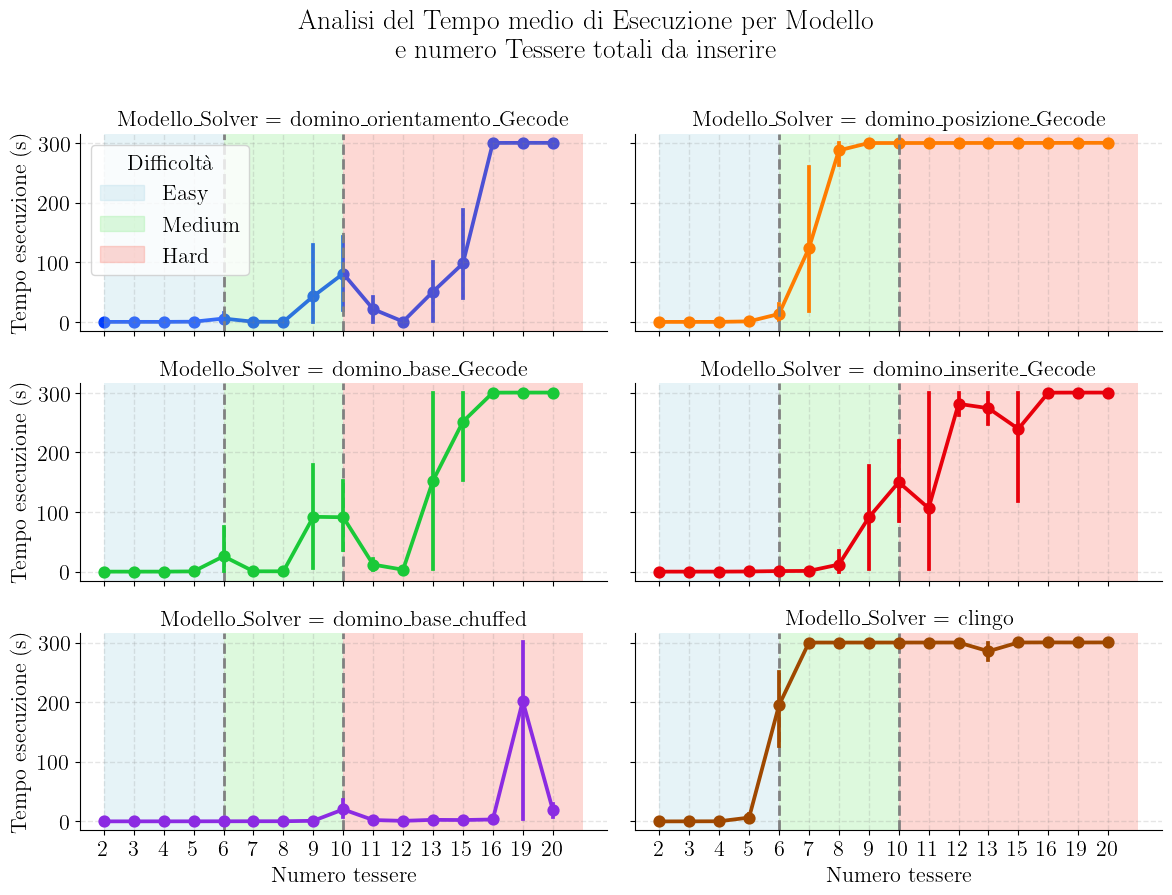

In [111]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'

g = sns.catplot(x='Numero tessere', 
                y='Tempo esecuzione (s)', 
                hue='Modello_Solver', 
                data=df, 
                kind='point', 
                palette='bright', 
                col='Modello_Solver', 
                col_wrap=2, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=3, 
                aspect=2
                ) # Controllo del rapporto altezza/larghezza di ogni grafico

colors = ['lightblue', 'lightgreen', 'salmon']


# Cicla attraverso ciascun asse e aggiungi le bande colorate
for ax in g.axes.ravel():
    ax.axvspan(xmin=0, xmax=4, facecolor=colors[0], alpha=0.3)
    ax.axvspan(xmin=4, xmax=8, facecolor=colors[1], alpha=0.3)
    ax.axvspan(xmin=8, xmax=16, facecolor=colors[2], alpha=0.3)

# Cicla attraverso ciascun asse e aggiungi le linee verticali a ID=5 e ID=8
for ax in g.axes.ravel():
    ax.axvline(x=4, color='grey', ls='--', lw=2) # 
    ax.axvline(x=8, color='grey', ls='--', lw=2) # 
    
    # Aggiungi la griglia con alta opacità
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1, alpha=0.2)


# Crea le patch per la legenda
easy_patch = mpatches.Patch(color='lightblue', label='Easy', alpha=0.3)
medium_patch = mpatches.Patch(color='lightgreen', label='Medium', alpha=0.3)
hard_patch = mpatches.Patch(color='salmon', label='Hard', alpha=0.3)

# Aggiungi la legenda al primo asse (subplot)
g.axes[0].legend(handles=[easy_patch, medium_patch, hard_patch], title="Difficoltà", loc='best')

# Aggiungi il titolo unico sopra tutti i grafici
g.fig.suptitle('Analisi del Tempo medio di Esecuzione per Modello \ne numero Tessere totali da inserire', fontsize=20, y=1)


# Utilizza plt.tight_layout() con un'aggiustamento per 'pad'
plt.tight_layout()
plt.savefig('tempi_n_tessere.png', bbox_inches='tight')
plt.show()




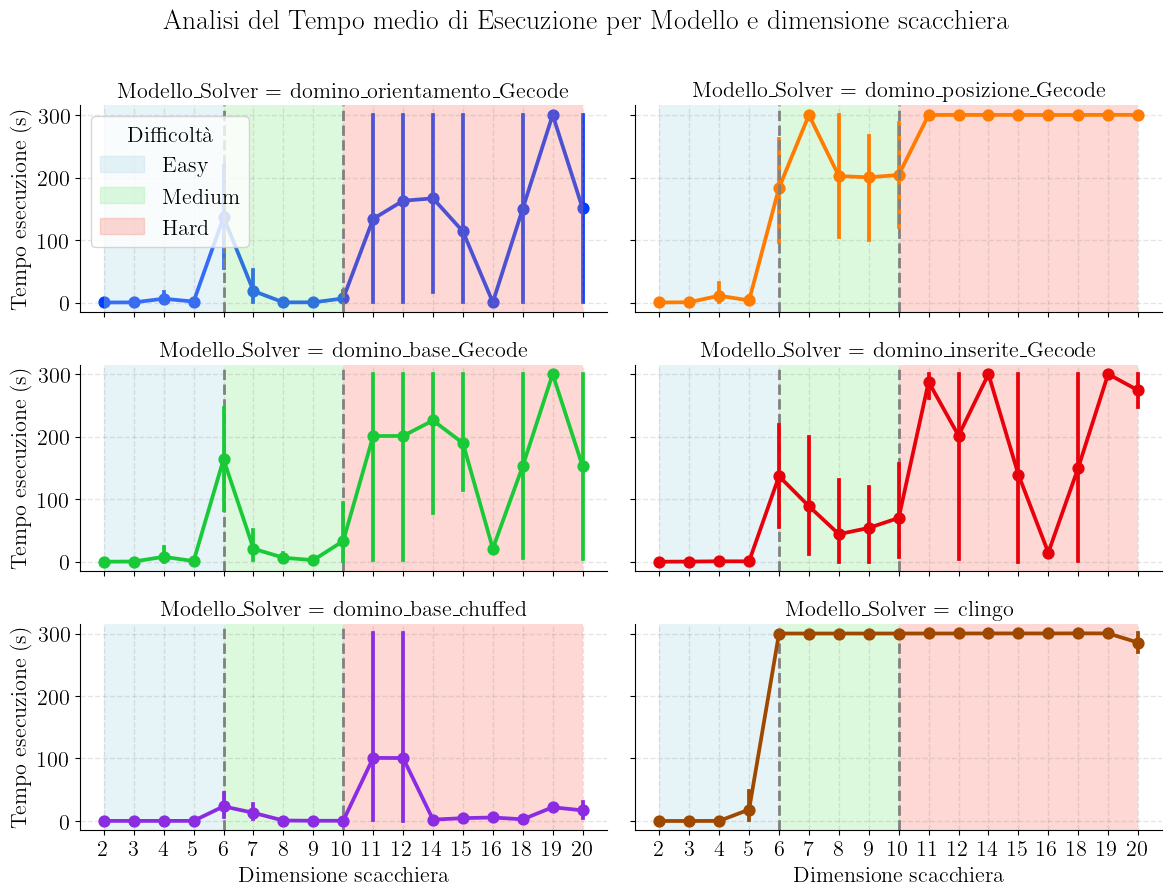

In [112]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'

g = sns.catplot(x='Dimensione scacchiera', 
                y='Tempo esecuzione (s)', 
                hue='Modello_Solver', 
                data=df, 
                kind='point', 
                palette='bright', 
                col='Modello_Solver', 
                col_wrap=2, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=3, 
                aspect=2
                ) # Controllo del rapporto altezza/larghezza di ogni grafico

colors = ['lightblue', 'lightgreen', 'salmon']


# Cicla attraverso ciascun asse e aggiungi le bande colorate
for ax in g.axes.ravel():
    ax.axvspan(xmin=0, xmax=4, facecolor=colors[0], alpha=0.3)
    ax.axvspan(xmin=4, xmax=8, facecolor=colors[1], alpha=0.3)
    ax.axvspan(xmin=8, xmax=16, facecolor=colors[2], alpha=0.3)

# Cicla attraverso ciascun asse e aggiungi le linee verticali a ID=5 e ID=8
for ax in g.axes.ravel():
    ax.axvline(x=4, color='grey', ls='--', lw=2) # 
    ax.axvline(x=8, color='grey', ls='--', lw=2) # 
    
    # Aggiungi la griglia con alta opacità
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1, alpha=0.2)


# Crea le patch per la legenda
easy_patch = mpatches.Patch(color='lightblue', label='Easy', alpha=0.3)
medium_patch = mpatches.Patch(color='lightgreen', label='Medium', alpha=0.3)
hard_patch = mpatches.Patch(color='salmon', label='Hard', alpha=0.3)

# Aggiungi la legenda al primo asse (subplot)
g.axes[0].legend(handles=[easy_patch, medium_patch, hard_patch], title="Difficoltà", loc='best')

# Aggiungi il titolo unico sopra tutti i grafici
g.fig.suptitle('Analisi del Tempo medio di Esecuzione per Modello e dimensione scacchiera', fontsize=20, y=1)

# Utilizza plt.tight_layout() con un'aggiustamento per 'pad'
plt.tight_layout()
plt.savefig('tempi_dimensione_scacchiera.png', bbox_inches='tight')
plt.show()




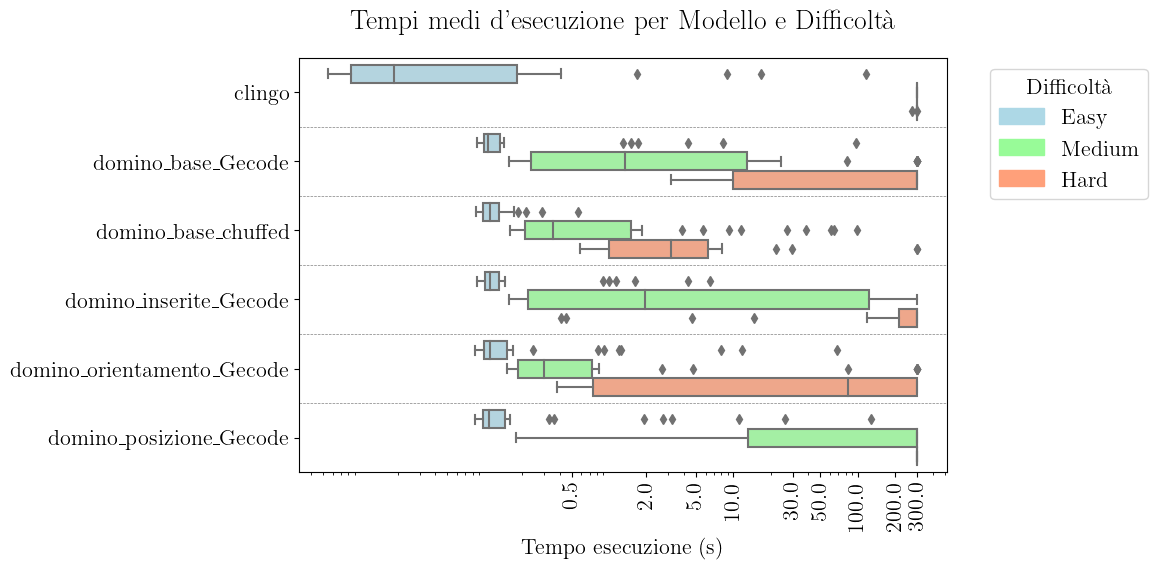

In [113]:
# Converti le colonne pertinenti in tipi appropriati, se necessario
df['Tempo esecuzione (s)'] = df['Tempo esecuzione (s)'].astype(float)
# Imposta l'ordine delle categorie per 'Difficoltà'
df['Difficoltà'] = pd.Categorical(df['Difficoltà'], categories=["easy", "medium", "hard"], ordered=True)
df['Modello_Solver'] = df['Modello_Solver'].astype('category')

# Definisci i colori con l'opacità alpha = 0.3
colors = [(0.678, 0.847, 0.902, 1), (0.596, 0.984, 0.596, 1), (1.0, 0.627, 0.478, 1)]

# Crea il boxplot usando i colori personalizzati
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(y='Modello_Solver', x='Tempo esecuzione (s)', hue='Difficoltà', data=df, palette=colors)

# Imposta la scala logaritmica sull'asse x
plt.xscale('log')

# Imposta i tick sull'asse x in modo che siano leggibili e sensati per una scala logaritmica
boxplot.set_xticks([0.5, 2, 5, 10, 30, 50, 100, 200, 300])
boxplot.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Aggiungi linee orizzontali tra i solvers
for i in range(len(df['Modello_Solver'].cat.categories) - 1):
    plt.axhline(i + 0.5, color='grey', linestyle='--', linewidth=0.5)

# Aggiungi titolo e etichette agli assi
plt.title('Tempi medi d\'esecuzione per Modello e Difficoltà', fontsize=20, y=1.05)
plt.ylabel('')
plt.xlabel('Tempo esecuzione (s)')

# Migliora la leggibilità ruotando le etichette dell'asse x
plt.xticks(rotation=90)

# Sposta la legenda con i nuovi colori
handles, labels = boxplot.get_legend_handles_labels()
new_labels = ['Easy', 'Medium', 'Hard']
new_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(new_handles, new_labels, title='Difficoltà', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('tempi_boxplot.png')
plt.show()




In [114]:
media_tempi

,Modello_Solver,Difficoltà,Tempo esecuzione (s)
0,clingo,easy,3.689155
1,clingo,hard,298.644887
2,clingo,medium,300.006447
3,domino_base_Gecode,easy,2.922962
4,domino_base_Gecode,hard,181.332819
5,domino_base_Gecode,medium,57.307184
6,domino_base_chuffed,easy,0.133249
7,domino_base_chuffed,hard,34.732248
8,domino_base_chuffed,medium,8.304987
9,domino_inserite_Gecode,easy,0.478813


In [115]:
df.to_csv('df_final.csv', index=False)

In [116]:
file_path = 'domino_minizinc/df_results_extreme.csv'

# Carica il file CSV in un DataFrame
df_extreme = pd.read_csv(file_path)

In [117]:
df_extreme

,ID,Modello,Difficoltà,Numero tessere,Dimensione scacchiera,Tempo esecuzione (s),Totale tessere,Tessere inserite,Tessere non inserite,solver,batch
0,1,domino_base,extreme,17,17,4.988076,17,17,0,chuffed,0
1,2,domino_base,extreme,19,19,15.667139,19,19,0,chuffed,0
2,3,domino_base,extreme,21,21,36.364725,21,21,0,chuffed,0
3,4,domino_base,extreme,23,23,300.853731,23,0,23,chuffed,0
4,5,domino_base,extreme,25,25,301.079927,25,0,25,chuffed,0
5,6,domino_base,extreme,27,27,301.276932,27,0,27,chuffed,0
6,7,domino_base,extreme,29,29,301.341168,29,0,29,chuffed,0
7,8,domino_base,extreme,31,31,301.550119,31,0,31,chuffed,0
8,9,domino_base,extreme,33,33,301.687482,33,0,33,chuffed,0
9,10,domino_base,extreme,35,35,301.920392,35,0,35,chuffed,0


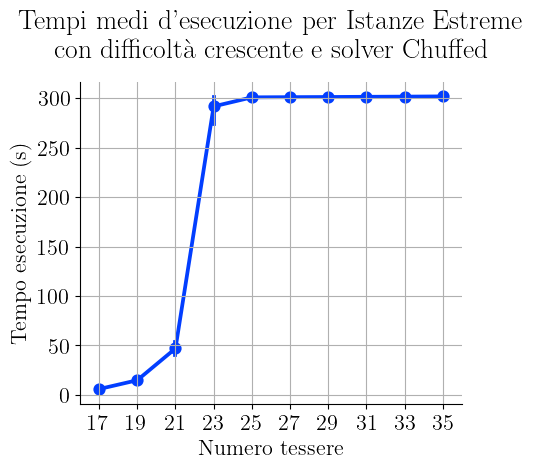

In [118]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'
g = sns.catplot(x='Numero tessere', 
                y='Tempo esecuzione (s)', 
                hue='Modello', 
                data=df_extreme, 
                kind='point', 
                palette='bright', 
                col='Modello', 
                col_wrap=1, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=5, 
                aspect=1) # Controllo del rapporto altezza/larghezza di ogni grafico

plt.title('Tempi medi d\'esecuzione per Istanze Estreme \ncon difficoltà crescente e solver Chuffed',fontsize=20, y=1.05)
plt.grid(True)
plt.tight_layout() # Ottimizza la disposizione dei grafici per ridurre sovrapposizioni
plt.savefig("tempi_extreme.png",bbox_inches='tight')
plt.show()




# Eng

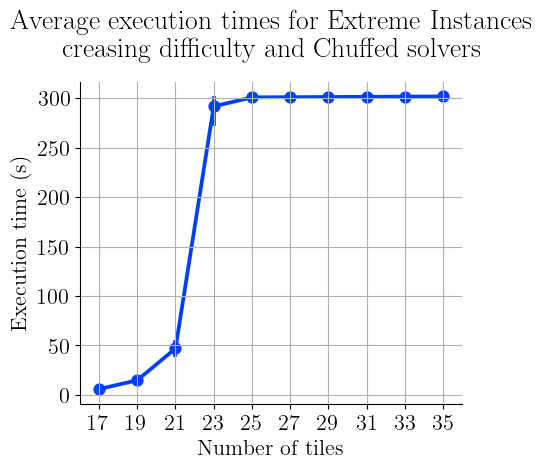

In [119]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'
g = sns.catplot(x='Numero tessere', 
                y='Tempo esecuzione (s)', 
                hue='Modello', 
                data=df_extreme, 
                kind='point', 
                palette='bright', 
                col='Modello', 
                col_wrap=1, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=5, 
                aspect=1) # Controllo del rapporto altezza/larghezza di ogni grafico
plt.xlabel("Number of tiles")
plt.ylabel("Execution time (s)")
plt.title('Average execution times for Extreme Instances \ncreasing difficulty and Chuffed solvers',fontsize=20, y=1.05)
plt.grid(True)
plt.tight_layout() # Ottimizza la disposizione dei grafici per ridurre sovrapposizioni
plt.savefig("tempi_extreme_eng.png",bbox_inches='tight')
plt.show()




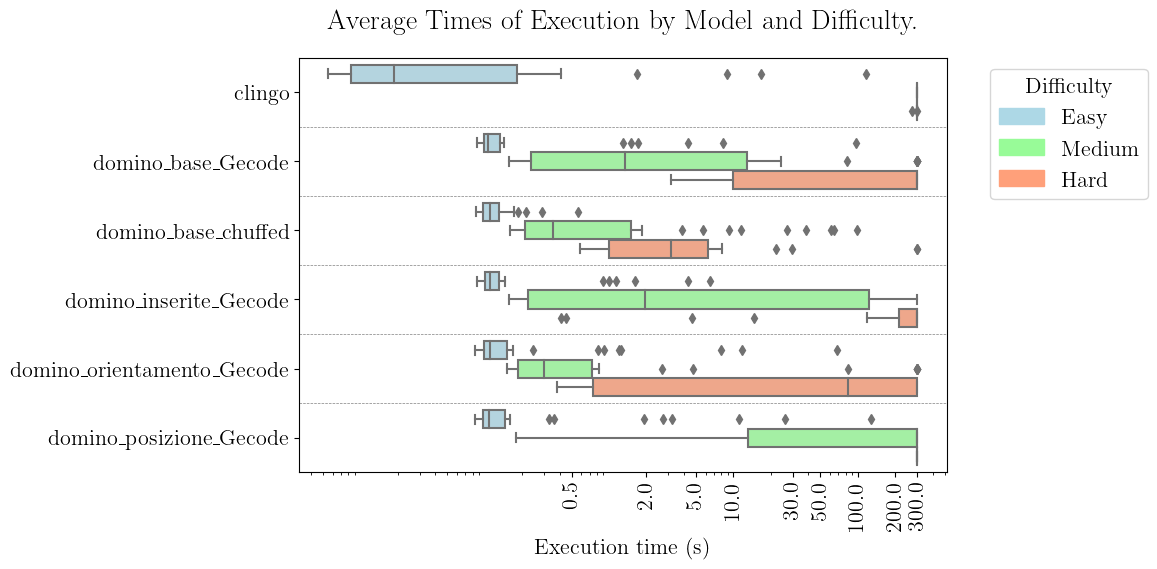

In [120]:
# Converti le colonne pertinenti in tipi appropriati, se necessario
df['Tempo esecuzione (s)'] = df['Tempo esecuzione (s)'].astype(float)
# Imposta l'ordine delle categorie per 'Difficoltà'
df['Difficoltà'] = pd.Categorical(df['Difficoltà'], categories=["easy", "medium", "hard"], ordered=True)
df['Modello_Solver'] = df['Modello_Solver'].astype('category')

# Definisci i colori con l'opacità alpha = 0.3
colors = [(0.678, 0.847, 0.902, 1), (0.596, 0.984, 0.596, 1), (1.0, 0.627, 0.478, 1)]

# Crea il boxplot usando i colori personalizzati
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(y='Modello_Solver', x='Tempo esecuzione (s)', hue='Difficoltà', data=df, palette=colors)

# Imposta la scala logaritmica sull'asse x
plt.xscale('log')

# Imposta i tick sull'asse x in modo che siano leggibili e sensati per una scala logaritmica
boxplot.set_xticks([0.5, 2, 5, 10, 30, 50, 100, 200, 300])
boxplot.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Aggiungi linee orizzontali tra i solvers
for i in range(len(df['Modello_Solver'].cat.categories) - 1):
    plt.axhline(i + 0.5, color='grey', linestyle='--', linewidth=0.5)

# Aggiungi titolo e etichette agli assi
plt.title('Average Times of Execution by Model and Difficulty.', fontsize=20, y=1.05)
plt.ylabel('')
plt.xlabel('Execution time (s)')

# Migliora la leggibilità ruotando le etichette dell'asse x
plt.xticks(rotation=90)

# Sposta la legenda con i nuovi colori
handles, labels = boxplot.get_legend_handles_labels()
new_labels = ['Easy', 'Medium', 'Hard']
new_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(new_handles, new_labels, title='Difficulty', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('tempi_boxplot_eng.png')
plt.show()




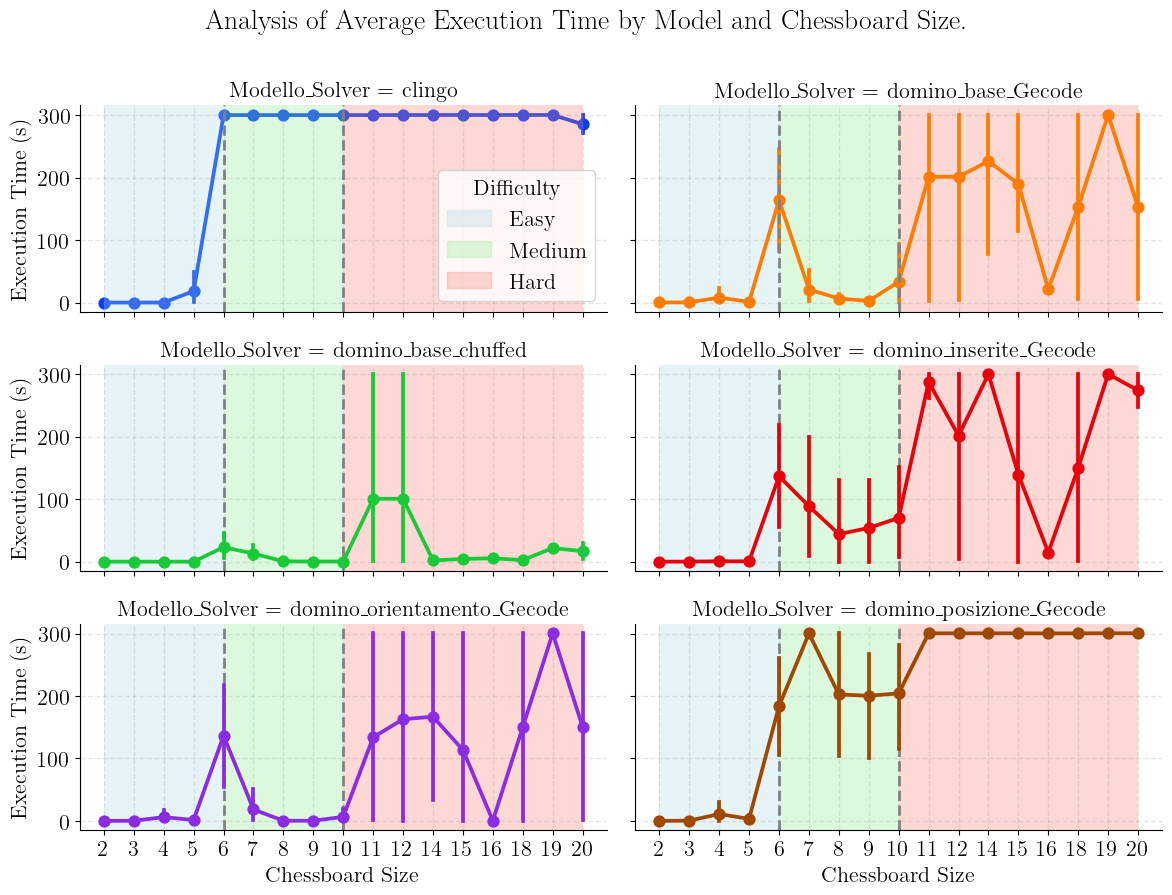

In [121]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'

g = sns.catplot(x='Dimensione scacchiera', 
                y='Tempo esecuzione (s)', 
                hue='Modello_Solver', 
                data=df, 
                kind='point', 
                palette='bright', 
                col='Modello_Solver', 
                col_wrap=2, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=3, 
                aspect=2
                ) # Controllo del rapporto altezza/larghezza di ogni grafico

colors = ['lightblue', 'lightgreen', 'salmon']


# Cicla attraverso ciascun asse e aggiungi le bande colorate
for ax in g.axes.ravel():
    ax.axvspan(xmin=0, xmax=4, facecolor=colors[0], alpha=0.3)
    ax.axvspan(xmin=4, xmax=8, facecolor=colors[1], alpha=0.3)
    ax.axvspan(xmin=8, xmax=16, facecolor=colors[2], alpha=0.3)

# Cicla attraverso ciascun asse e aggiungi le linee verticali a ID=5 e ID=8
for ax in g.axes.ravel():
    ax.axvline(x=4, color='grey', ls='--', lw=2) # 
    ax.axvline(x=8, color='grey', ls='--', lw=2) # 
    
    # Aggiungi la griglia con alta opacità
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1, alpha=0.2)
plt.ylabel('Execution time (s)')
plt.xlabel('Chessboard size')

# Crea le patch per la legenda
easy_patch = mpatches.Patch(color='lightblue', label='Easy', alpha=0.3)
medium_patch = mpatches.Patch(color='lightgreen', label='Medium', alpha=0.3)
hard_patch = mpatches.Patch(color='salmon', label='Hard', alpha=0.3)

# Aggiungi la legenda al primo asse (subplot)
g.axes[0].legend(handles=[easy_patch, medium_patch, hard_patch], title="Difficulty", loc='best')

# Aggiungi il titolo unico sopra tutti i grafici
g.fig.suptitle('Analysis of Average Execution Time by Model and Chessboard Size.', fontsize=20, y=1)
g.set_axis_labels("Chessboard Size", "Execution Time (s)") # Cambia i nomi degli assi qui



# Utilizza plt.tight_layout() con un'aggiustamento per 'pad'
plt.tight_layout()
plt.savefig('tempi_dimensione_scacchiera_eng.png', bbox_inches='tight')
plt.show()




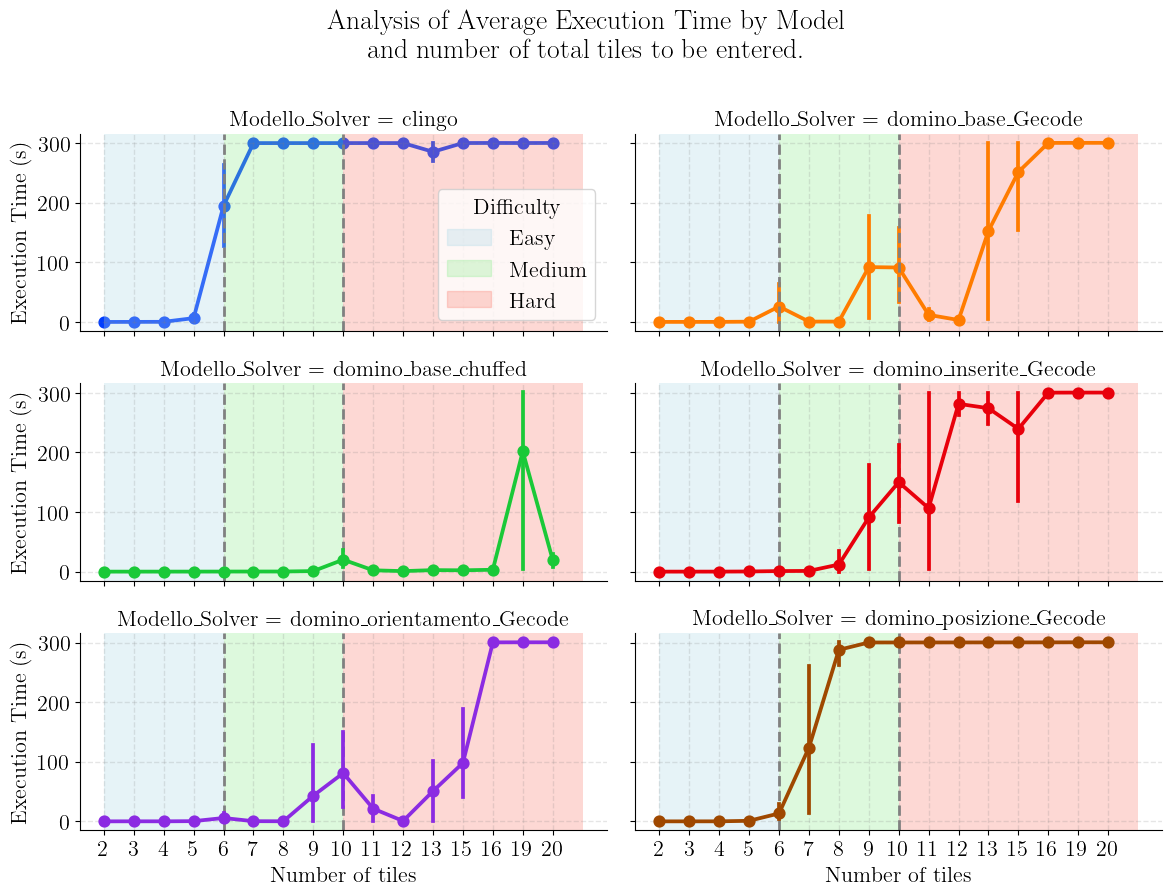

In [122]:

import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'

g = sns.catplot(x='Numero tessere', 
                y='Tempo esecuzione (s)', 
                hue='Modello_Solver', 
                data=df, 
                kind='point', 
                palette='bright', 
                col='Modello_Solver', 
                col_wrap=2, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=3, 
                aspect=2
                ) # Controllo del rapporto altezza/larghezza di ogni grafico

colors = ['lightblue', 'lightgreen', 'salmon']


# Cicla attraverso ciascun asse e aggiungi le bande colorate
for ax in g.axes.ravel():
    ax.axvspan(xmin=0, xmax=4, facecolor=colors[0], alpha=0.3)
    ax.axvspan(xmin=4, xmax=8, facecolor=colors[1], alpha=0.3)
    ax.axvspan(xmin=8, xmax=16, facecolor=colors[2], alpha=0.3)

# Cicla attraverso ciascun asse e aggiungi le linee verticali a ID=5 e ID=8
for ax in g.axes.ravel():
    ax.axvline(x=4, color='grey', ls='--', lw=2) # 
    ax.axvline(x=8, color='grey', ls='--', lw=2) # 
    
    # Aggiungi la griglia con alta opacità
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1, alpha=0.2)


# Crea le patch per la legenda
easy_patch = mpatches.Patch(color='lightblue', label='Easy', alpha=0.3)
medium_patch = mpatches.Patch(color='lightgreen', label='Medium', alpha=0.3)
hard_patch = mpatches.Patch(color='salmon', label='Hard', alpha=0.3)

# Aggiungi la legenda al primo asse (subplot)
g.axes[0].legend(handles=[easy_patch, medium_patch, hard_patch], title="Difficulty", loc='best')

# Aggiungi il titolo unico sopra tutti i grafici
g.fig.suptitle('Analysis of Average Execution Time by Model \n and number of total tiles to be entered.', fontsize=20, y=1)
g.set_axis_labels("Number of tiles", "Execution Time (s)") # Cambia i nomi degli assi qui


# Utilizza plt.tight_layout() con un'aggiustamento per 'pad'
plt.tight_layout()
plt.savefig('tempi_n_tessere_eng.png', bbox_inches='tight')
plt.show()




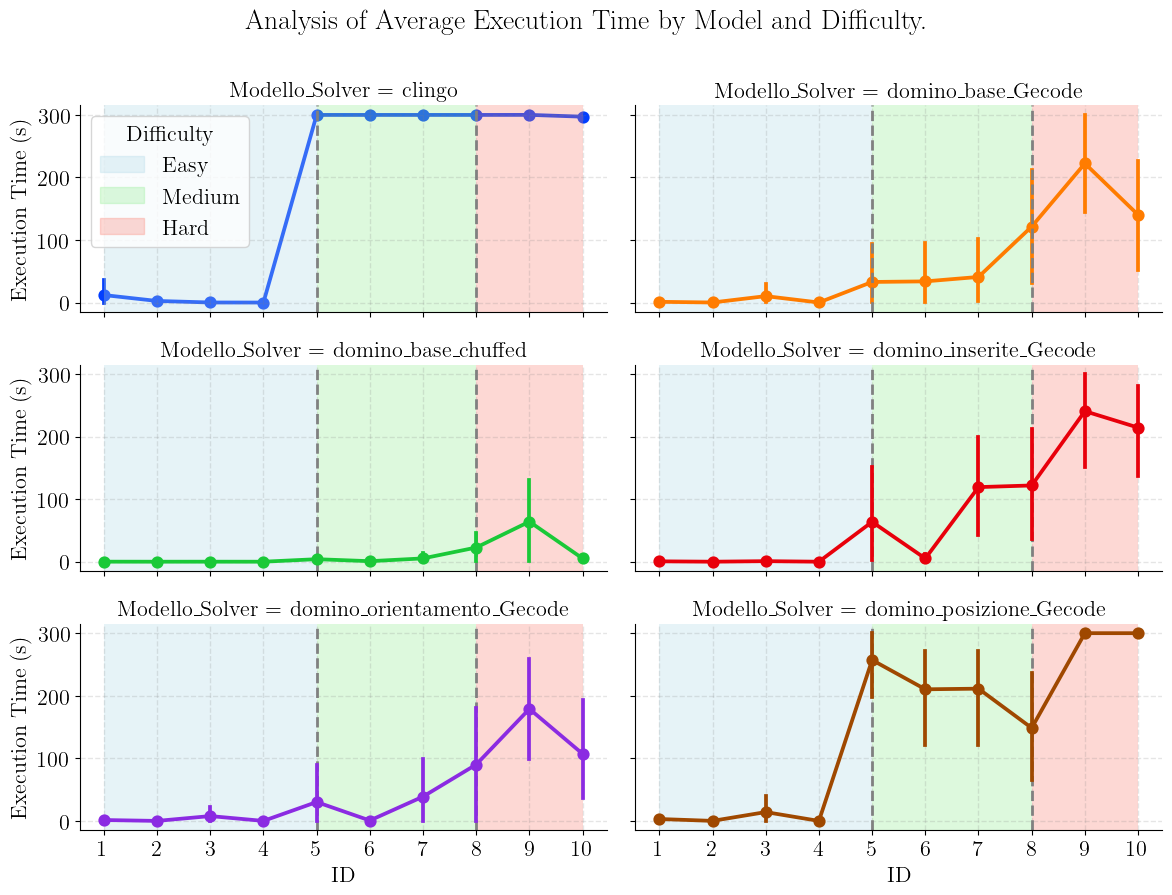

In [123]:
import matplotlib.patches as mpatches

# Usa sns.catplot() per creare un grafico a barre affiancate per ogni 'Modello_Solver'
# Imposta 'kind' su 'bar' per creare un bar plot
# L'argomento 'col' specifica che vogliamo separare i grafici per ogni 'Modello_Solver'

g = sns.catplot(x='ID', 
                y='Tempo esecuzione (s)', 
                hue='Modello_Solver', 
                data=df, 
                kind='point', 
                palette='bright', 
                col='Modello_Solver', 
                col_wrap=2, # Puoi modificare questo numero per controllare quante colonne di grafici vuoi per riga
                height=3, 
                aspect=2
                ) # Controllo del rapporto altezza/larghezza di ogni grafico

colors = ['lightblue', 'lightgreen', 'salmon']


# Cicla attraverso ciascun asse e aggiungi le bande colorate
for ax in g.axes.ravel():
    # Banda colorata prima della prima linea verticale (ID < 5)
    ax.axvspan(xmin=0, xmax=4, facecolor=colors[0], alpha=0.3)
    # Banda colorata tra la prima e la seconda linea verticale (5 <= ID < 8)
    ax.axvspan(xmin=4, xmax=7, facecolor=colors[1], alpha=0.3)
    # Banda colorata dopo la seconda linea verticale (ID >= 8)
    ax.axvspan(xmin=7, xmax=9, facecolor=colors[2], alpha=0.3)

# Cicla attraverso ciascun asse e aggiungi le linee verticali a ID=5 e ID=8
for ax in g.axes.ravel():
    # Aggiungi la prima linea verticale a ID=5
    ax.axvline(x=4, color='grey', ls='--', lw=2) # 
    # Aggiungi la seconda linea verticale a ID=8
    ax.axvline(x=7, color='grey', ls='--', lw=2) # 
    
    # Aggiungi la griglia con alta opacità
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1, alpha=0.2)


# Crea le patch per la legenda
easy_patch = mpatches.Patch(color='lightblue', label='Easy', alpha=0.3)
medium_patch = mpatches.Patch(color='lightgreen', label='Medium', alpha=0.3)
hard_patch = mpatches.Patch(color='salmon', label='Hard', alpha=0.3)

# Aggiungi la legenda al primo asse (subplot)
g.axes[0].legend(handles=[easy_patch, medium_patch, hard_patch], title="Difficulty", loc='best')

# Aggiungi il titolo unico sopra tutti i grafici
g.fig.suptitle('Analysis of Average Execution Time by Model and Difficulty.', fontsize=20, y = 1)

g.set_axis_labels("ID", "Execution Time (s)") # Cambia i nomi degli assi qui

# Utilizza plt.tight_layout() con un'aggiustamento per 'pad'
plt.tight_layout()

# Quando salvi l'immagine, usa bbox_inches='tight' per includere il titolo
plt.savefig('tempi_eng.png', bbox_inches='tight')
plt.show()


